# Proprocessing MNE

## import packages and data

In [2]:
import numpy as np 
import mne 
from mne.preprocessing import ICA 
from mne.time_frequency import tfr_morlet
import os

In [3]:
os.getcwd()

'/Users/zhengyuanrui/EEG-Prepro-learn/script'

In [4]:
data_path = "../data/eeglab_data.set"
locs_info_path = "../data/eeglab_chan32.locs"
raw = mne.io.read_raw_eeglab(data_path, preload=True) 

Reading /Users/zhengyuanrui/EEG-Prepro-learn/script/../data/eeglab_data.fdt
Reading 0 ... 30503  =      0.000 ...   238.305 secs...


In [5]:
print(raw.info)

<Info | 8 non-empty values
 bads: []
 ch_names: FPz, EOG1, F3, Fz, F4, EOG2, FC5, FC1, FC2, FC6, T7, C3, C4, Cz, ...
 chs: 32 EEG
 custom_ref_applied: False
 dig: 35 items (3 Cardinal, 32 EEG)
 highpass: 0.0 Hz
 lowpass: 64.0 Hz
 meas_date: unspecified
 nchan: 32
 projs: []
 sfreq: 128.0 Hz
>

In [8]:
montage = mne.channels.read_custom_montage(locs_info_path)
new_chan_names = np.loadtxt(locs_info_path, dtype=str, usecols=3)
old_chan_names = raw.info["ch_names"] 
chan_names_dict = {old_chan_names[i]:new_chan_names[i] for i in range(32)} 
# update names
raw.rename_channels(chan_names_dict)
# import montage 
raw.set_montage(montage) 

<RawEEGLAB | eeglab_data.fdt, 32 x 30504 (238.3 s), ~7.5 MB, data loaded>

In [11]:
chan_types_dict = {"EOG1":"eog", "EOG2":"eog"} 
raw.set_channel_types(chan_types_dict) 

<RawEEGLAB | eeglab_data.fdt, 32 x 30504 (238.3 s), ~7.5 MB, data loaded>

In [12]:
print(raw.info)

<Info | 8 non-empty values
 bads: []
 ch_names: FPz, EOG1, F3, Fz, F4, EOG2, FC5, FC1, FC2, FC6, T7, C3, C4, Cz, ...
 chs: 30 EEG, 2 EOG
 custom_ref_applied: False
 dig: 35 items (3 Cardinal, 32 EEG)
 highpass: 0.0 Hz
 lowpass: 64.0 Hz
 meas_date: unspecified
 nchan: 32
 projs: []
 sfreq: 128.0 Hz
>


## plot channel

Using matplotlib as 2D backend.


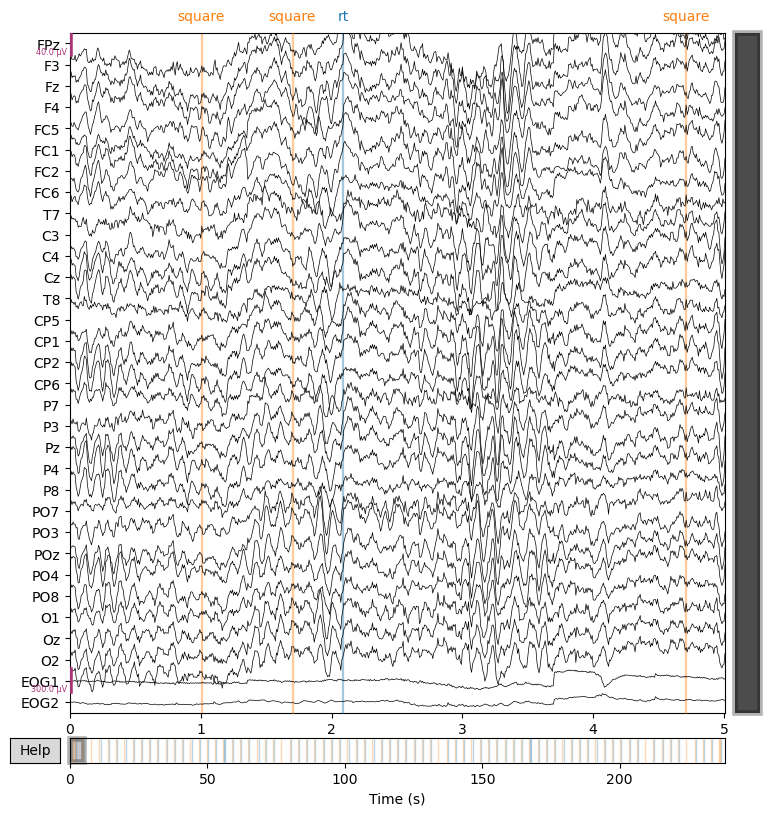

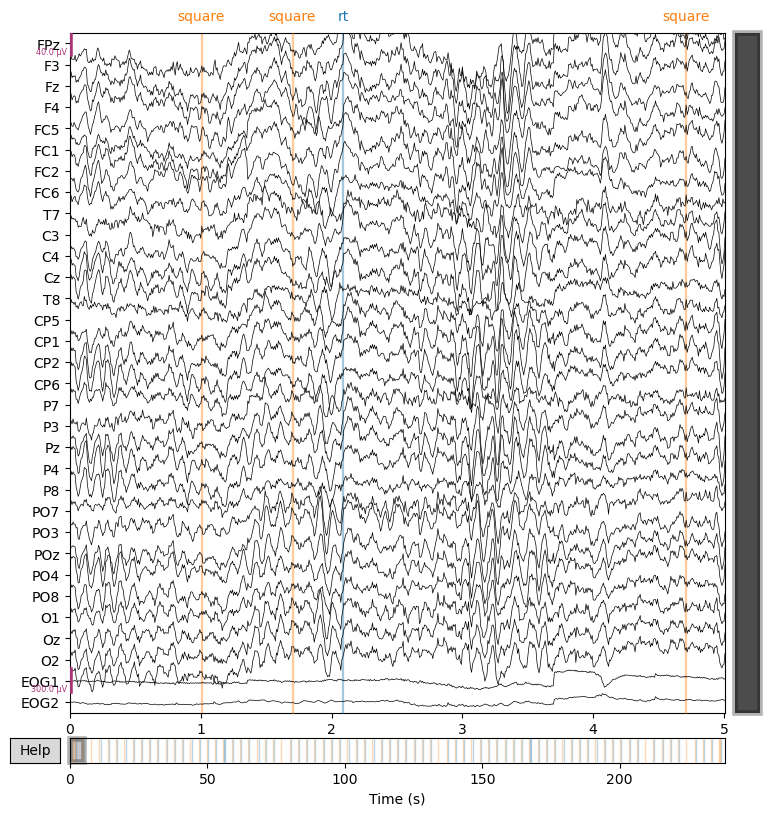

In [13]:
raw.plot(duration=5, n_channels=32, clipping=None) 

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 16.000 (s)


/Users/zhengyuanrui/anaconda3/envs/MNE/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


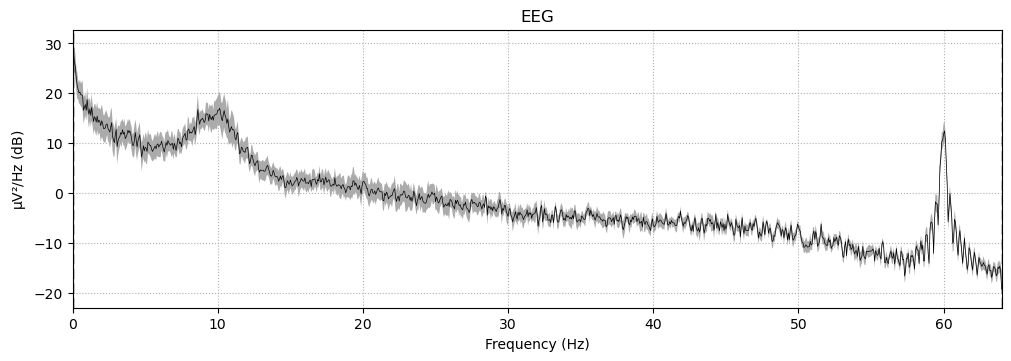

In [14]:
raw.plot_psd(average=True)

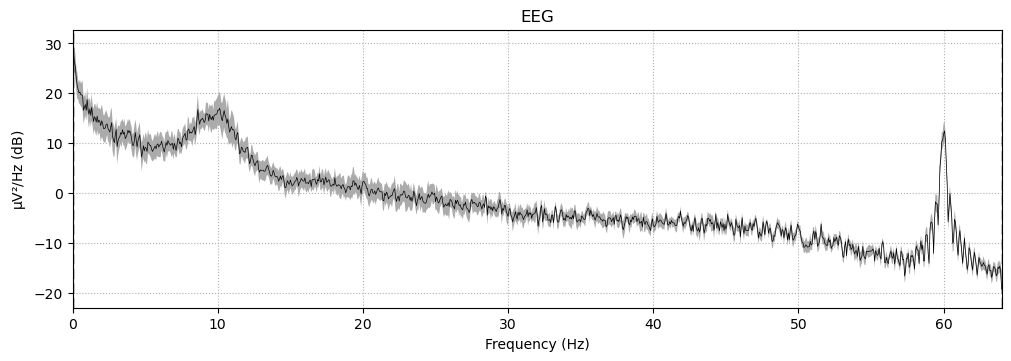

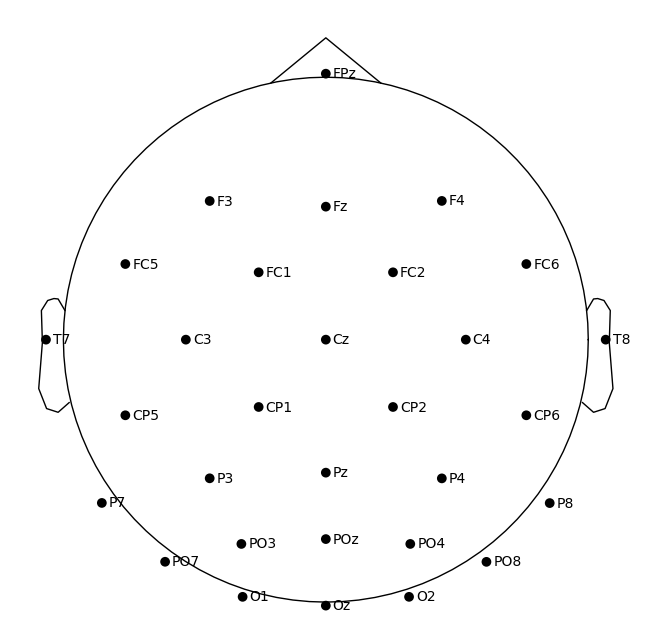

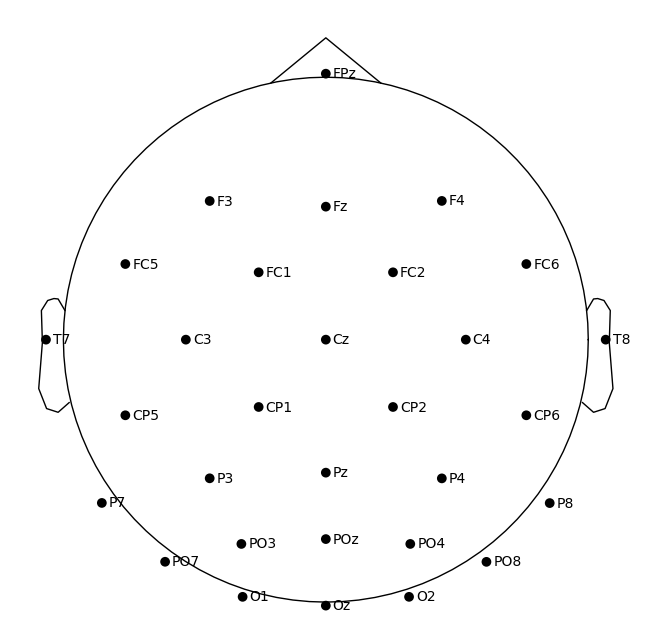

In [15]:
raw.plot_sensors(ch_type='eeg', show_names=True) 

Effective window size : 16.000 (s)


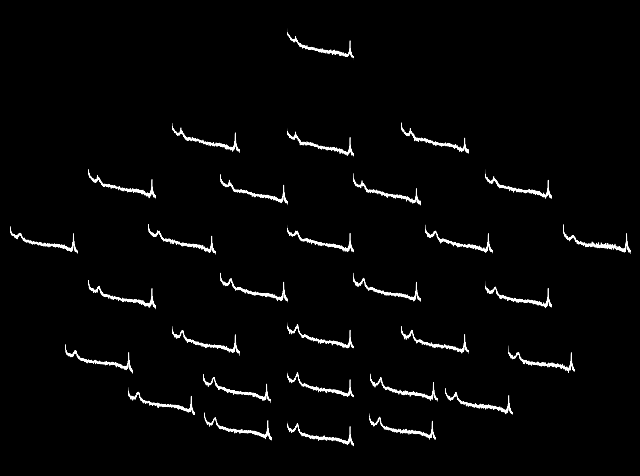

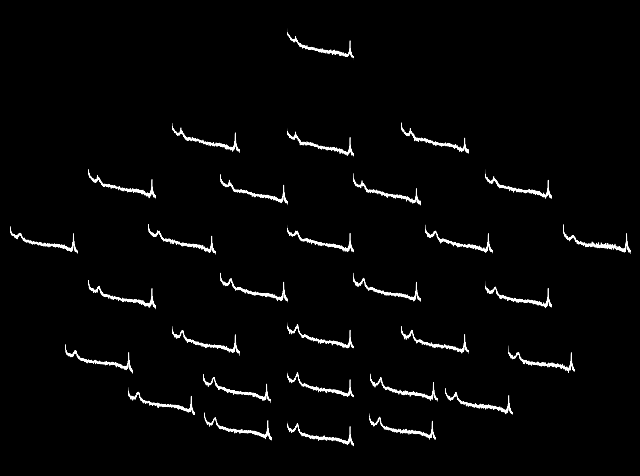

In [17]:
raw .compute_psd().plot_topo()

## filter

In [20]:
raw = raw.filter(l_freq=0.1, h_freq=30)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4225 samples (33.008 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 16.000 (s)


/Users/zhengyuanrui/anaconda3/envs/MNE/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


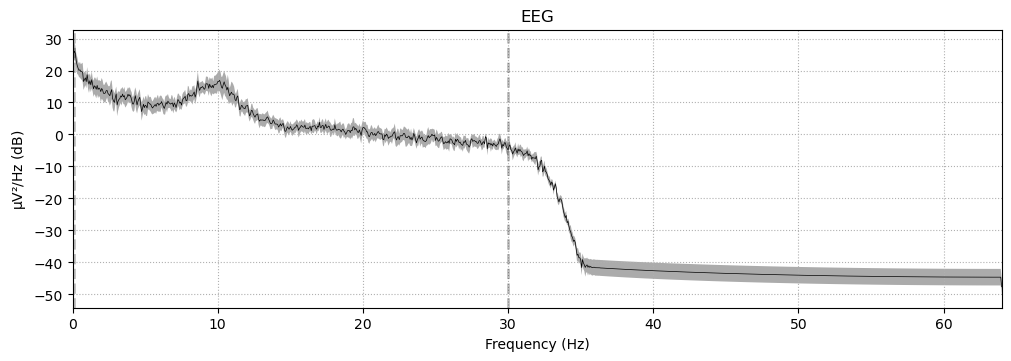

In [21]:
raw.plot_psd(average=True)

## epoch

In [22]:
print(raw.annotations)

<Annotations | 154 segments: rt (74), square (80)>


In [23]:
events, event_id = mne.events_from_annotations(raw) 

Used Annotations descriptions: ['rt', 'square']


In [24]:
print(events.shape, event_id) 

(154, 3) {'rt': 1, 'square': 2}


In [25]:
#baseline
epochs = mne.Epochs(raw, events, event_id=2, tmin=-1, tmax=2, baseline=(-1, 0),  preload=True) 

Not setting metadata
80 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 80 events and 385 original time points ...
0 bad epochs dropped


In [26]:
print(epochs)

<Epochs |  80 events (all good), -1 – 2 s, baseline -1 – 0 s, ~7.6 MB, data loaded,
 '2': 80>


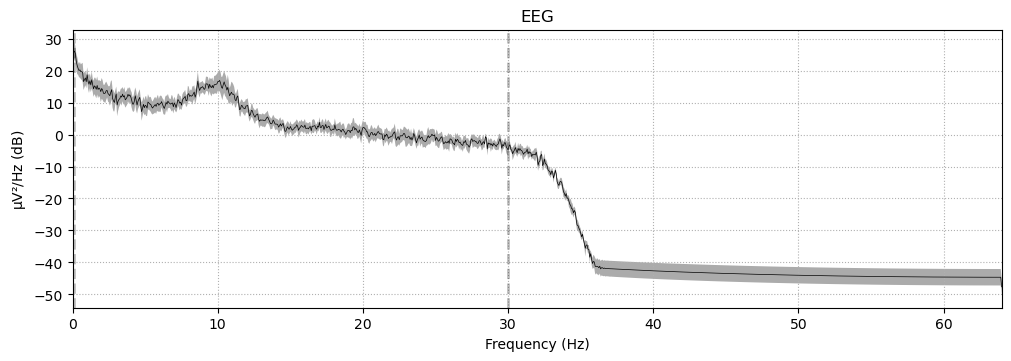

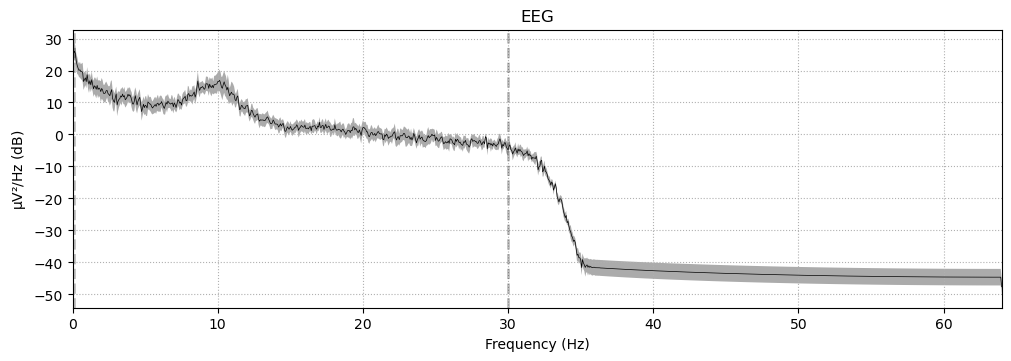

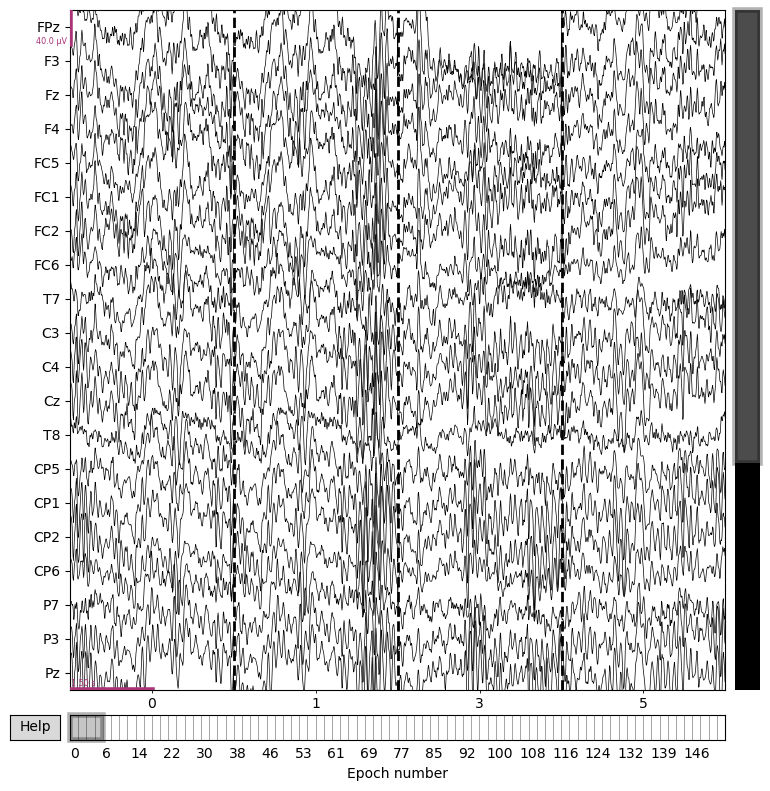

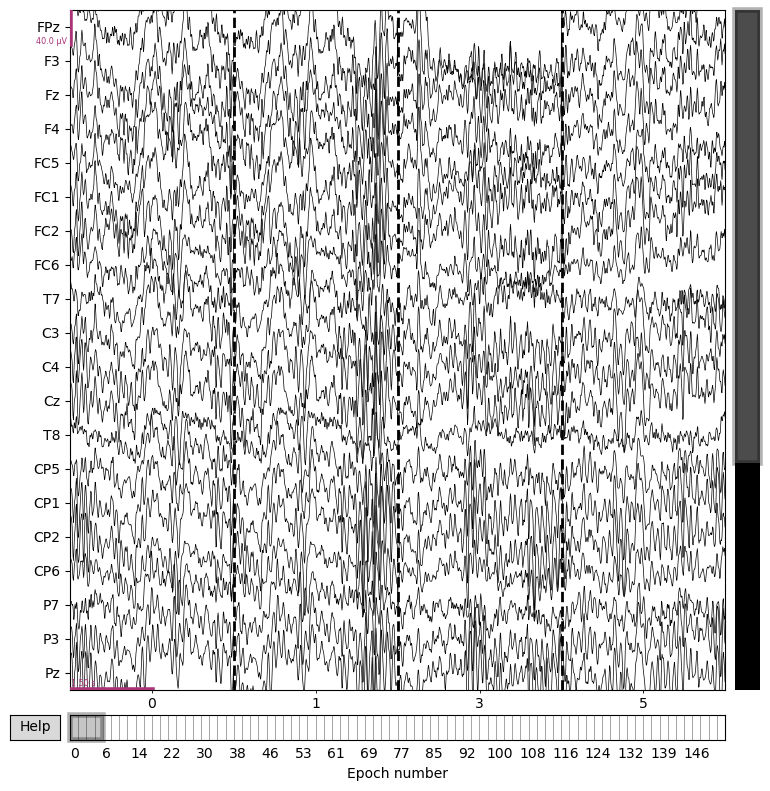

In [27]:
epochs.plot(n_epochs=4)

In [28]:
ica = ICA(max_iter='auto').fit(epochs)


Fitting ICA to data using 30 channels (please be patient, this may take a while)


/var/folders/06/d73mk4410yg1bfrx52fmy4jw0000gn/T/ipykernel_29630/4254458796.py:1: RuntimeWarning: The epochs you passed to ICA.fit() were baseline-corrected. However, we suggest to fit ICA only on data that has been high-pass filtered, but NOT baseline-corrected.
  ica = ICA(max_iter='auto').fit(epochs)


Selecting by non-zero PCA components: 30 components
Fitting ICA took 5.1s.


Not setting metadata
80 matching events found
No baseline correction applied
0 projection items activated


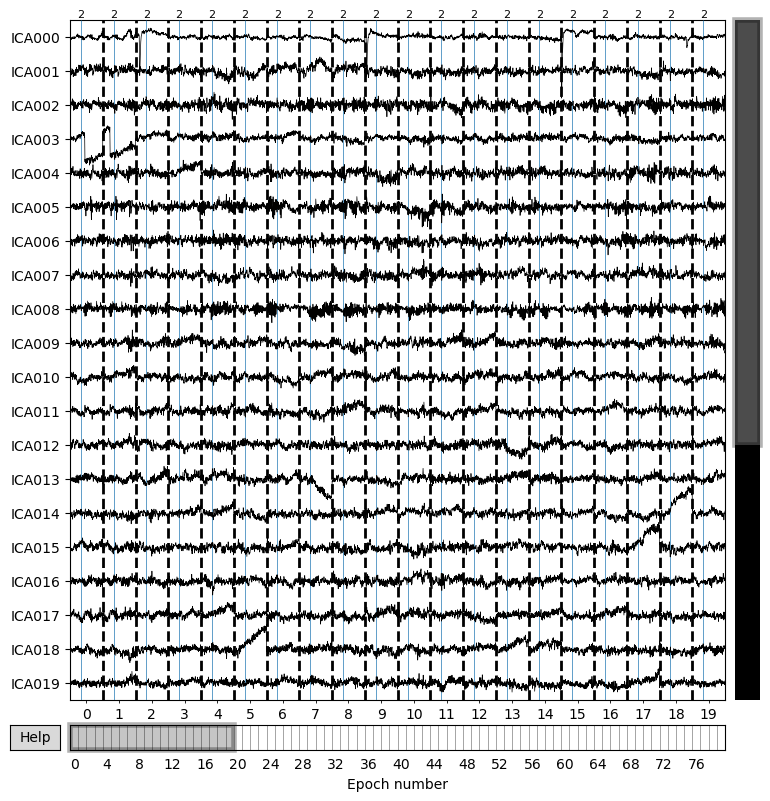

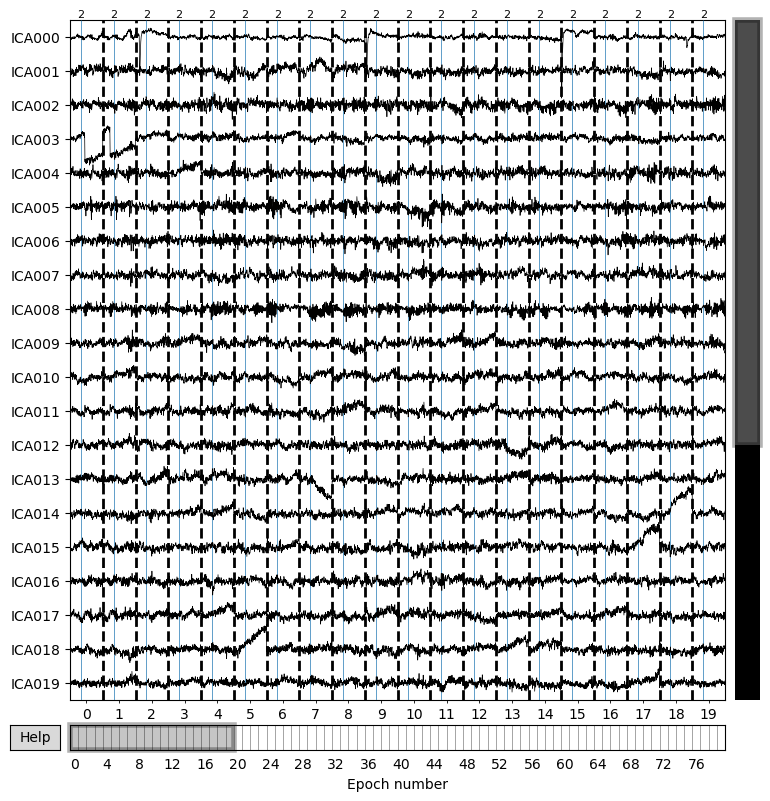

In [30]:
ica.plot_sources(epochs) 


    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
80 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
80 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
80 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
80 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
80 matching events found
No baseline correction applied
0 projection items activated


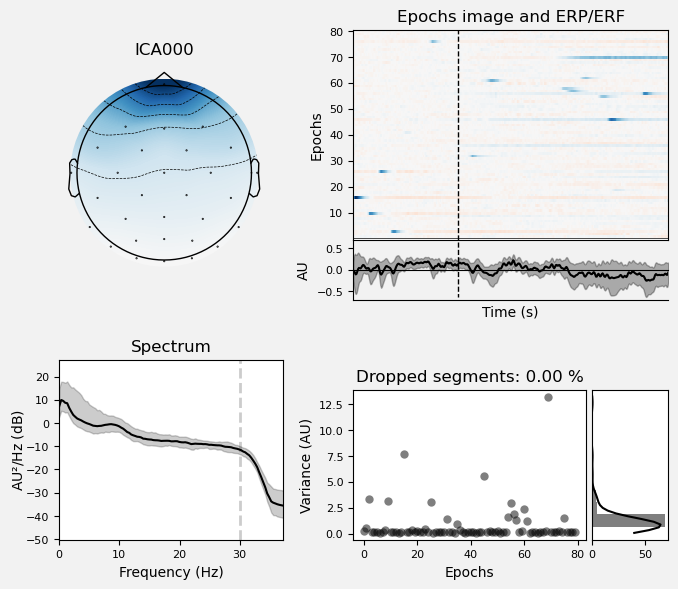

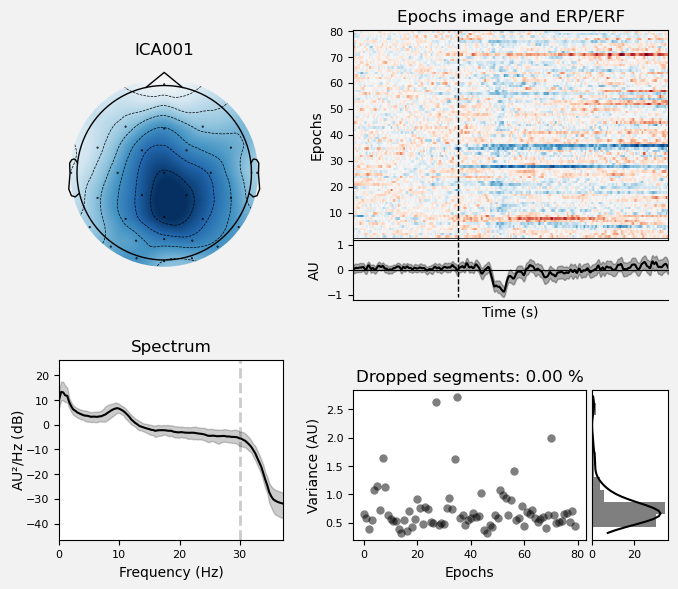

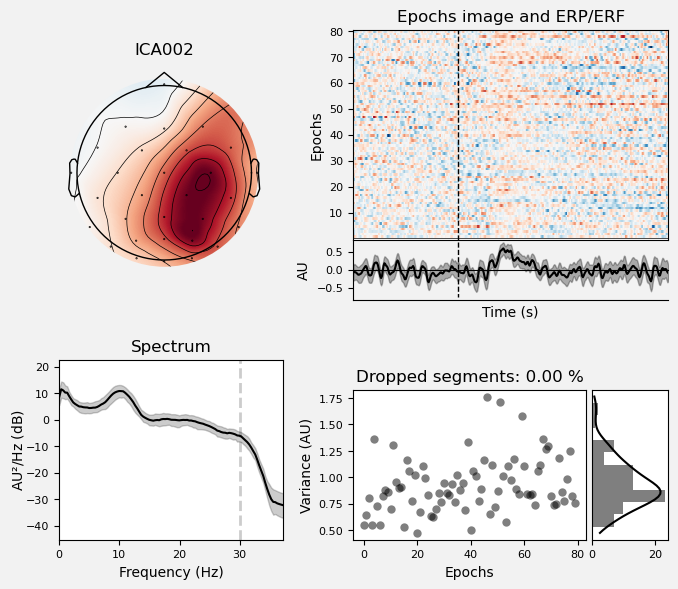

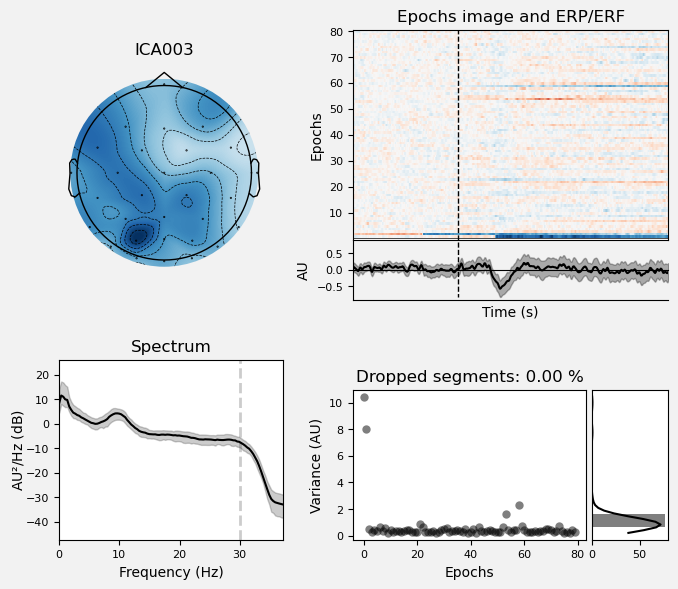

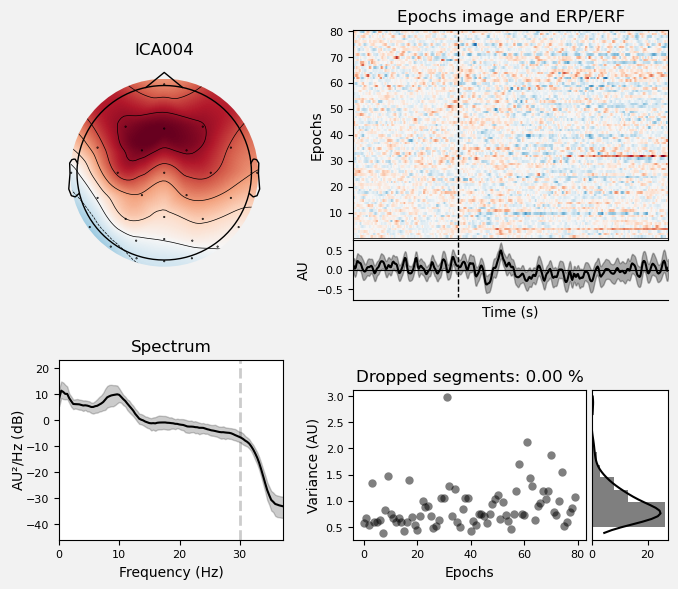

[<Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>]

In [31]:
ica.plot_properties(epochs)

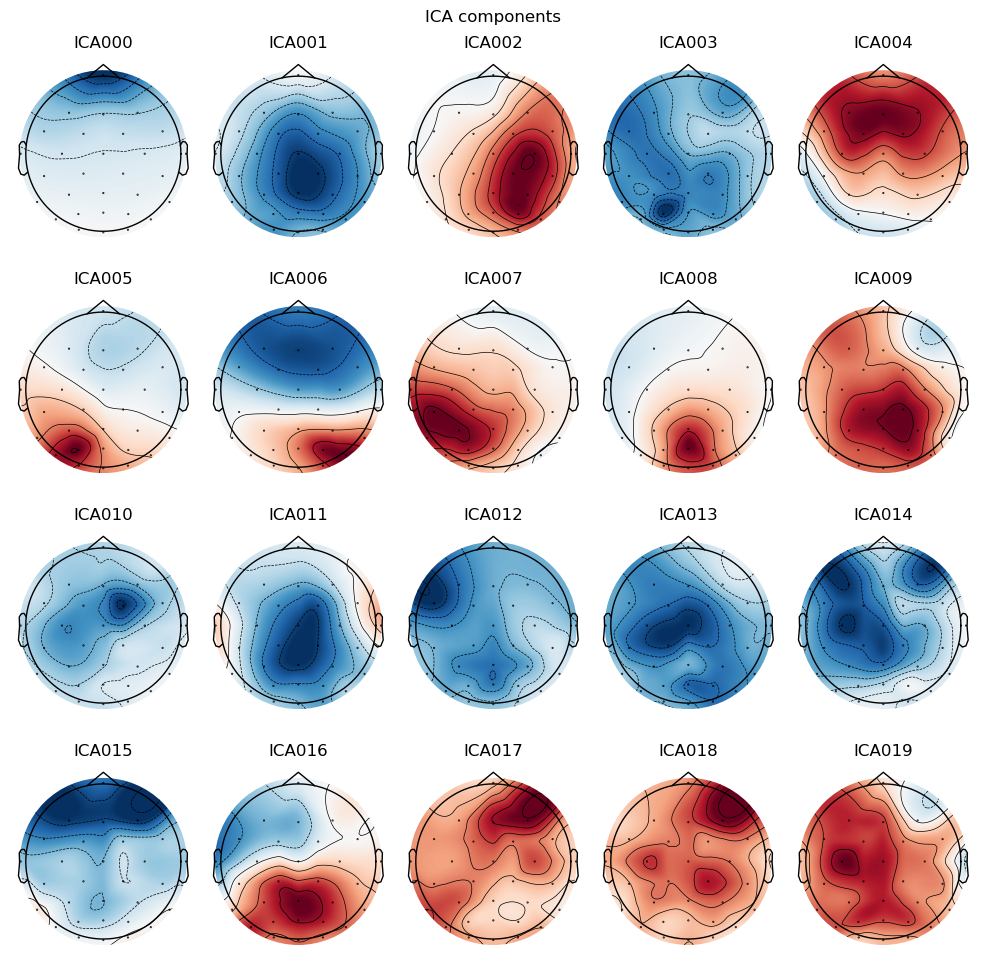

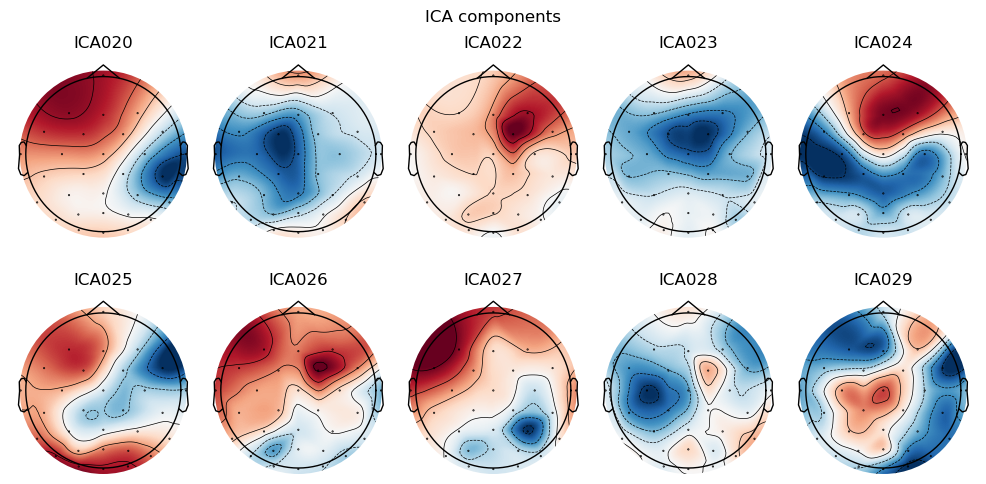

[<MNEFigure size 975x967 with 20 Axes>, <MNEFigure size 975x496 with 10 Axes>]

In [32]:
ica.plot_components() 